In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Linear regression class that implement mean square error cost function, R Square method, Gradiant Descend Algorithm and predict method to predict new instances based on paramter learn in fit method

In [73]:
class LinearRegression:
    def __init__(self):
        # Initialize weight and bais
        self.weight=0.0
        self.bias=0.0
     # Calculate Mean square error
    def MSE(self,y_true,y_pred,n):
        self.error=np.mean((np.square(y_true-y_pred)))
        return self.error
     # Implement gradiant descent algorithm
    def fit(self,X_train,y_train,epoch,learning_rate):
       # Reshape x and y
        X_train = X_train.reshape(-1)
        y_train = y_train.reshape(-1)
        n=len(y_train)
        cost_list=[]
        epoch_list=[]
        for i in range(epoch):
            # Make Predictions
            self.y_pred= X_train * self.weight + self.bias
            # Caculate loss
            loss=self.MSE(y_train,self.y_pred,len(y_train))
       
            # partial derivatives of cost function to update weight
            self.dw=(-2/n) * np.sum(X_train*(y_train - self.y_pred))
            self.db=(-2/n) * np.sum(y_train - self.y_pred)
            # New weights
            self.weight = self.weight - self.dw * learning_rate
            self.bias = self.bias - self.db * learning_rate
            cost_list.append(loss)
            epoch_list.append(i)
            if(i%20==0):
               print(f"Cost : {loss} \n epcoh  : {i} \n weight {self.weight} \n bias {self.bias}")
        return cost_list,epoch_list
    # Mthod to predict new instances based on learned weight and bias
    def predict(self,X_test):
        self.y_pred= self.weight * X_test + self.bias
        print(self.y_pred)
        return self.y_pred
    # Method to calculate R Square score to determine how much model learn variability in data
    def R_square(self,y_test,y_pred):
        # r_square=1-SSR/SST
        self.y_mean=np.mean(y_test)
        self.nom = np.sum(np.square((y_test - y_pred)))
        self.denom = np.sum(np.square((y_test-self.y_mean)))
        self.r_square=1 -  (self.nom / self.denom)
        return self.r_square
        

## Initialize object of LinearRegression class

In [74]:
obj=LinearRegression()

In [75]:
x=np.array([2,3,4,5,6,7])
y=np.array([1,2,3,4,5,6])

In [76]:
# run gradiant descent.Epochs are 50000 learning rate is 0.001
cost_list,epoch_list=obj.fit(x,y,50000,0.001)

Cost : 15.166666666666666 
 epcoh  : 0 
 weight 0.03733333333333333 
 bias 0.007
Cost : 2.2541604152796446 
 epcoh  : 20 
 weight 0.5009548370228787 
 bias 0.09174536890639153
Cost : 0.4546102998799437 
 epcoh  : 40 
 weight 0.6746429592106878 
 bias 0.11990431706676927
Cost : 0.20264852286433357 
 epcoh  : 60 
 weight 0.7401322836473057 
 bias 0.12696347661057547
Cost : 0.16621490742208647 
 epcoh  : 80 
 weight 0.7652413988692465 
 bias 0.12616544523743084
Cost : 0.1598084467792881 
 epcoh  : 100 
 weight 0.7752784363765746 
 bias 0.12245193171843402
Cost : 0.15759639868036576 
 epcoh  : 120 
 weight 0.7796877417322531 
 bias 0.1176669715234774
Cost : 0.15598120641895696 
 epcoh  : 140 
 weight 0.7819937122365789 
 bias 0.11249863020842779
Cost : 0.15446175604551843 
 epcoh  : 160 
 weight 0.7835115759334195 
 bias 0.1072035961108183
Cost : 0.1529681411867553 
 epcoh  : 180 
 weight 0.7847321568574207 
 bias 0.10187757930771171
Cost : 0.1514905060248223 
 epcoh  : 200 
 weight 0.7858

In [77]:
# Make new predictions
y_pred=obj.predict(x)

[1.00000378 2.00000257 3.00000136 4.00000015 4.99999894 5.99999772]


In [78]:
print(f"R_square : {obj.R_square(y,y_pred)*100:.1f}%")

R_square : 100.0%


## Plot cost list and epoch list to visualize how model learn and reduce cost as epcoh increases

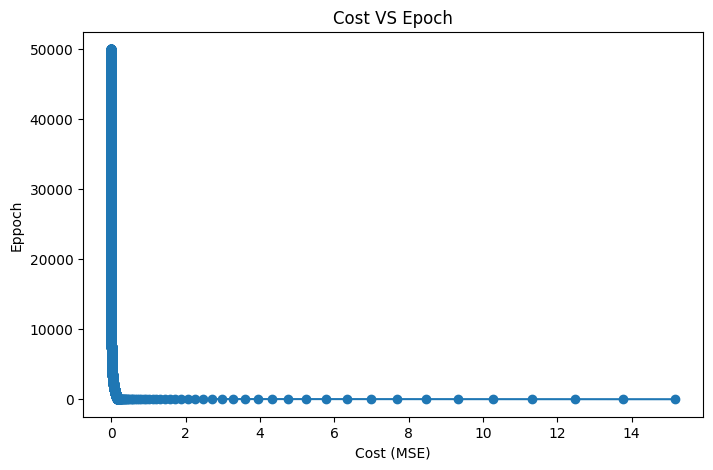

In [79]:
plt.figure(figsize=(8,5))
plt.plot(cost_list,epoch_list,marker='o')
plt.title("Cost VS Epoch")
plt.xlabel("Cost (MSE)")
plt.ylabel("Eppoch")
plt.savefig("Cost-vs-epoch.png")
plt.show()

In [ ]:
sorted_idx = x.argsort()
x_sorted = x[sorted_idx]
y_pred_sorted = y_pred[sorted_idx]
plt.figure(figsize=(8, 5))
plt.scatter(x, y, label="Data Points")
plt.plot(x_sorted, y_pred_sorted, label="Regression Line")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Linear Regression Fit")
plt.legend()
plt.savefig('Linear-regression-line.png')
plt.show()

## Now let train our model on some random Synthatic Data

In [57]:
np.random.seed(42)
x = 2 * np.random.rand(100)
y= x + np.random.randn(100)
x = x.flatten()
y = y.flatten()

In [58]:
obj.fit(x,y,epoch=50000,learning_rate=0.001)

Cost : 0.8065845639670534 
 epcoh  : 0 
 weight 0.7701133864385816 
 bias 0.21509615754664957
Cost : 0.8065845639670534 
 epcoh  : 20 
 weight 0.7701133864385816 
 bias 0.21509615754664957
Cost : 0.8065845639670534 
 epcoh  : 40 
 weight 0.7701133864385816 
 bias 0.21509615754664957
Cost : 0.8065845639670534 
 epcoh  : 60 
 weight 0.7701133864385816 
 bias 0.21509615754664957
Cost : 0.8065845639670534 
 epcoh  : 80 
 weight 0.7701133864385816 
 bias 0.21509615754664957
Cost : 0.8065845639670534 
 epcoh  : 100 
 weight 0.7701133864385816 
 bias 0.21509615754664957
Cost : 0.8065845639670534 
 epcoh  : 120 
 weight 0.7701133864385816 
 bias 0.21509615754664957
Cost : 0.8065845639670534 
 epcoh  : 140 
 weight 0.7701133864385816 
 bias 0.21509615754664957
Cost : 0.8065845639670534 
 epcoh  : 160 
 weight 0.7701133864385816 
 bias 0.21509615754664957
Cost : 0.8065845639670534 
 epcoh  : 180 
 weight 0.7701133864385816 
 bias 0.21509615754664957
Cost : 0.8065845639670534 
 epcoh  : 200 
 wei

([np.float64(0.8065845639670534),
  np.float64(0.8065845639670534),
  np.float64(0.8065845639670534),
  np.float64(0.8065845639670534),
  np.float64(0.8065845639670534),
  np.float64(0.8065845639670534),
  np.float64(0.8065845639670534),
  np.float64(0.8065845639670534),
  np.float64(0.8065845639670534),
  np.float64(0.8065845639670534),
  np.float64(0.8065845639670534),
  np.float64(0.8065845639670534),
  np.float64(0.8065845639670534),
  np.float64(0.8065845639670534),
  np.float64(0.8065845639670534),
  np.float64(0.8065845639670534),
  np.float64(0.8065845639670534),
  np.float64(0.8065845639670534),
  np.float64(0.8065845639670534),
  np.float64(0.8065845639670534),
  np.float64(0.8065845639670534),
  np.float64(0.8065845639670534),
  np.float64(0.8065845639670534),
  np.float64(0.8065845639670534),
  np.float64(0.8065845639670534),
  np.float64(0.8065845639670534),
  np.float64(0.8065845639670534),
  np.float64(0.8065845639670534),
  np.float64(0.8065845639670534),
  np.float64(0

In [59]:
y_pred=obj.predict(y)

[ 0.85900899  1.44914222  1.41319903 -0.39348744  0.28622798  0.73038027
  1.44270408  1.15007701  0.51831785  0.91927868  0.95176437  1.96215291
  1.08927118  0.93742066  0.56990856  1.24354717  0.14303772  0.77100306
  0.5784217  -0.46341738  1.38553456  0.6309905   0.66900311  0.59871779
 -0.1724486   1.1005006   0.25871003  0.38928934  1.00334065  0.5978053
  2.60343002  0.61218669  0.51363337  1.61926327  0.22471707  1.43979271
  0.73065453  2.26250909  1.12083043  1.12525646  0.37633072  0.07776629
  1.14816543  2.19472948  1.22286031  0.53519927  1.77551258 -0.06346542
  1.50910047  2.18671314  0.94565108  0.97286302  1.73888043  1.20559986
 -0.05818895  1.6877928  -0.46669963  0.88167408 -0.42330447  1.90980388
  0.21055348  0.38501132  2.11804036 -0.1833279   0.82296895  2.05761933
 -0.80579294  1.59285043  0.53006027  2.3372181   0.45193593 -0.49573794
  0.62555566  1.69980355  1.49672466  1.60473692  0.87933125  0.50800339
  0.9929137  -0.1565708   2.98132909  1.5400217  -0.

In [60]:
r_square_score=obj.R_square(y,y_pred)

In [61]:
print(f"R Square Score : {r_square_score*100:.1f}%")

R Square Score : 94.7%


## Got accuraccy of 94 %

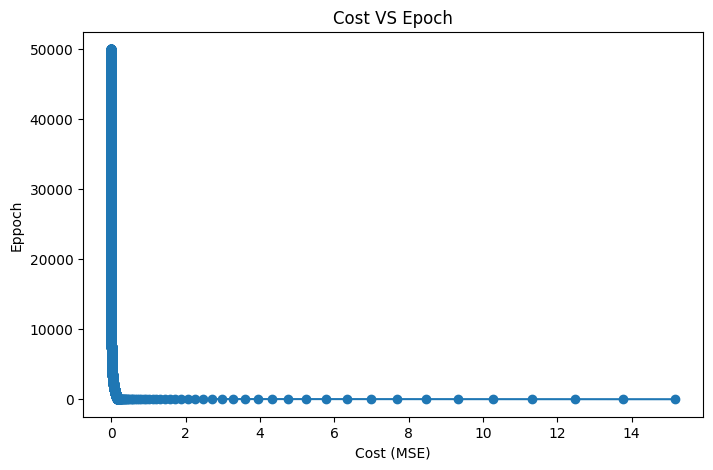

In [62]:
plt.figure(figsize=(8,5))
plt.plot(cost_list,epoch_list,marker='o')
plt.title("Cost VS Epoch")
plt.xlabel("Cost (MSE)")
plt.ylabel("Eppoch")
plt.savefig("Cost-vs-epoch2.png")
plt.show()

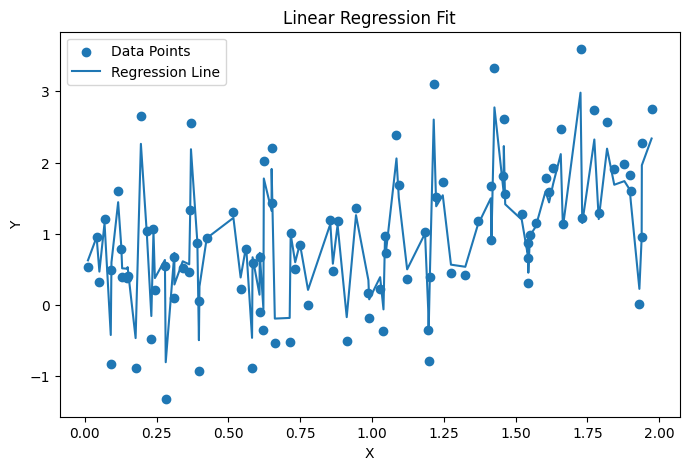

In [63]:
sorted_idx = x.argsort()
x_sorted = x[sorted_idx]
y_pred_sorted = y_pred[sorted_idx]
plt.figure(figsize=(8, 5))
plt.scatter(x, y, label="Data Points")
plt.plot(x_sorted, y_pred_sorted, label="Regression Line")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Linear Regression Fit")
plt.legend()
plt.show()


In [64]:
print(f"Weight : {obj.weight}")
print(f"Bias : {obj.bias}")

Weight : 0.7701133864385816
Bias : 0.21509615754664957


In [65]:
from sklearn.linear_model import LinearRegression

In [66]:
model=LinearRegression()
model.fit(x.reshape(-1,1),y)

LinearRegression()

In [67]:
print(f"Weight : {model.coef_}")
print(f"Bias : {model.intercept_}")

Weight : [0.77011339]
Bias : 0.21509615754674827


## As we see that we have got weight and bias through LinearRegrssion class almost equal to weight and bias of sklearn linear regression